In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

### Part One
- Defining a network topology
- Randomly assigning colours to each node 
- Running experiments to see if correct colouring of the graph can be reached.
- Counting the number of conflicts over time

In [2]:
n = 60
k = 6
p = 0.7

G = nx.random_graphs.connected_watts_strogatz_graph(n, k, p)


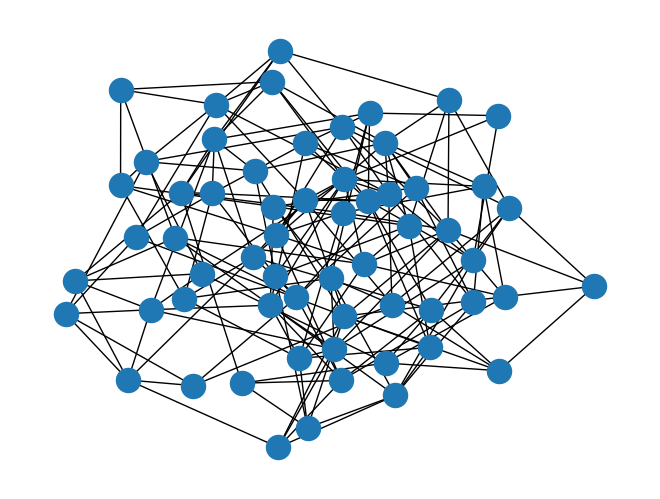

In [3]:
nx.draw(G)

In [4]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


In [5]:
def random_colouring(G, colours):
    for n in G:
        G.nodes[n]["colour"] = random.randrange(0, colours)

In [6]:
collisions_c = []

colours = []

for i in range(3, 12):
    colours.append({'num': i, 'max_collisions': 0, 'min_collisions': 50})

def check_colouring(G, num_colours, collision, max_collisions, min_collisions):
    for node in G:
        for n in G.neighbors(node):
            if G.nodes[node]['colour'] == G.nodes[n]['colour'] and node > n:
                G.nodes[node]['colour'] = random.randint(0, num_colours-1)
                collision = collision + 1


    if collision > max_collisions:
        max_collisions = collision

    if collision < min_collisions:
        min_collisions = collision
    
    return collision, max_collisions, min_collisions

for i in range(len(colours)):
    collisions_c.append([])
    random_colouring(G, colours[i]['num'])
    for j in range(10):
        collisions_c[i].append(0)
        collisions_c[i][j], colours[i]['max_collisions'], colours[i]['min_collisions'] = check_colouring(G, colours[i]['num'], collisions_c[i][j], colours[i]['max_collisions'], colours[i]['min_collisions'])
    print(f"Collisions over time for {colours[i]['num']} colours: {collisions_c[i]}")
    print(f"Max collisions: {colours[i]['max_collisions']} for number of colours: {colours[i]['num']}")
    print(f"Min collisions: {colours[i]['min_collisions']} for number of colours: {colours[i]['num']}")


Collisions over time for 3 colours: [50, 59, 49, 35, 35, 33, 26, 31, 28, 37]
Max collisions: 59 for number of colours: 3
Min collisions: 26 for number of colours: 3
Collisions over time for 4 colours: [47, 24, 33, 26, 27, 21, 25, 27, 28, 21]
Max collisions: 47 for number of colours: 4
Min collisions: 21 for number of colours: 4
Collisions over time for 5 colours: [40, 27, 19, 9, 15, 12, 4, 2, 3, 4]
Max collisions: 40 for number of colours: 5
Min collisions: 2 for number of colours: 5
Collisions over time for 6 colours: [29, 16, 5, 0, 0, 0, 0, 0, 0, 0]
Max collisions: 29 for number of colours: 6
Min collisions: 0 for number of colours: 6
Collisions over time for 7 colours: [28, 5, 2, 0, 0, 0, 0, 0, 0, 0]
Max collisions: 28 for number of colours: 7
Min collisions: 0 for number of colours: 7
Collisions over time for 8 colours: [21, 10, 5, 0, 0, 0, 0, 0, 0, 0]
Max collisions: 21 for number of colours: 8
Min collisions: 0 for number of colours: 8
Collisions over time for 9 colours: [21, 6, 

In [7]:
import csv

with open('collisions.csv', mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Number of colours', 'Collisions over time', 'Max collisions', 'Min collisions'])
    for i in range(len(colours)):
        writer.writerow([colours[i]['num'], collisions_c[i], colours[i]['max_collisions'], colours[i]['min_collisions']])

### Part Two

Pruning using prune_graph():
Before Pruning:
	Size:		180
	Diameter:	4
After Pruning:
	Size:		95
	Diameter:	8
Graph is 52.77777777777778% of its original size
Diameter increased by 100.0%



Pruning using prune_graph_least():
Before Pruning:
	Size:		180
	Diameter:	4
After Pruning:
	Size:		90
	Diameter:	9
Graph is 50.0% of its original size
Diameter increased by 125.0%


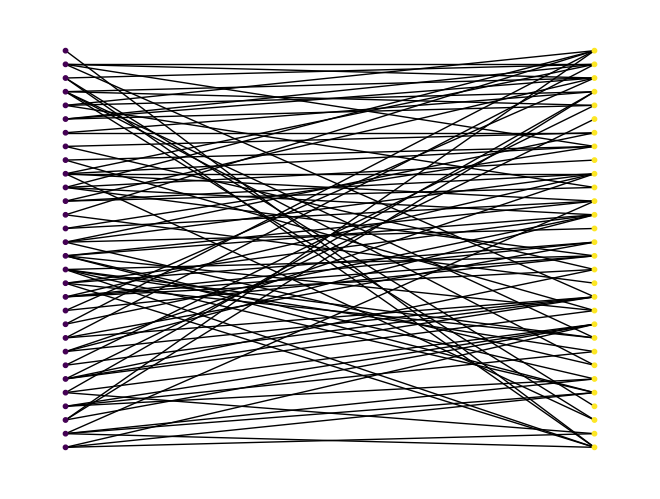

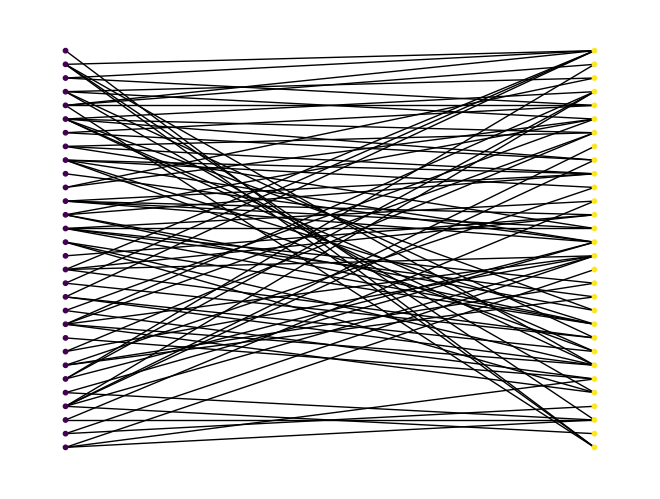

In [8]:
# Exploring reducing edges

# Recolour a graph with a number of colours
# Prune edges that cause unresolvable collisions
def prune_graph(G, colours):
    # Sort the nodes based on degree; low degree nodes can be recoloured easily
    nodes = sorted(list(G), key=lambda x: G.degree[x])
    #nodes = list(G)
    # Iterate through nodes in the graph
    for n in nodes:
        # Set conflicts to empty, set all colours to available
        conflicts = []
        c_available = dict([(c, True) for c in list(range(colours))])
        # Iterate through node's neighbours
        for m in G.neighbors(n):
            # Mark neighbour colour as unavailable; append to conflicts if it shares current node colour
            c_available[G.nodes[m]["colour"]] = False
            if G.nodes[n]["colour"] == G.nodes[m]["colour"]:
                conflicts.append((n, m))
        # Resolve existing conflicts
        if conflicts != []:
            solved = False
            # Attempt to recolour
            for c in c_available:
                if c_available[c]:
                    G.nodes[n]["colour"] = c
                    solved = True
            # Remove conflicting edges if recolour is not possible
            if not solved:
                G.remove_edges_from(conflicts)

# Recolour a graph, attempting to remove fewer edges by switching to a colour used by fewer neighbours
def prune_graph_least(G, colours):
    nodes = sorted(list(G), key=lambda x: G.degree[x])
    for n in nodes:
        c_used = dict([(c, []) for c in list(range(colours))])
        for m in G.neighbors(n):
            c_used[G.nodes[m]["colour"]].append((n, m))
        if len(c_used[G.nodes[n]["colour"]]) > 0:
            G.nodes[n]["colour"] = sorted(list(c_used), key=lambda x: c_used[x])[0]
            G.remove_edges_from(c_used[G.nodes[n]["colour"]])

c = 2
pruned_graph = G.copy()
random_colouring(pruned_graph, c)

print("Pruning using prune_graph():")
s_pre_p = pruned_graph.size()
d_pre_p = nx.diameter(pruned_graph)
print(f"Before Pruning:\n\tSize:\t\t{s_pre_p}\n\tDiameter:\t{d_pre_p}")
prune_graph(pruned_graph, c)
s_post_p = pruned_graph.size()
d_post_p = nx.diameter(pruned_graph)
print(f"After Pruning:\n\tSize:\t\t{s_post_p}\n\tDiameter:\t{d_post_p}")
print(f"Graph is {float(s_post_p) / float(s_pre_p) * 100}% of its original size\nDiameter increased by {((float(d_post_p) / float(d_pre_p)) - 1) * 100}%")

plt.figure()
pos = nx.bipartite_layout(pruned_graph, [n for n in pruned_graph if pruned_graph.nodes[n]["colour"] == 0])
nx.draw(pruned_graph, node_color=[pruned_graph.nodes[n]["colour"] for n in pruned_graph], pos=pos, node_size=10)

print("\n\n")

pruned_graph = G.copy()
random_colouring(pruned_graph, c)

print("Pruning using prune_graph_least():")
s_pre_p = pruned_graph.size()
d_pre_p = nx.diameter(pruned_graph)
print(f"Before Pruning:\n\tSize:\t\t{s_pre_p}\n\tDiameter:\t{d_pre_p}")
prune_graph(pruned_graph, c)
s_post_p = pruned_graph.size()
d_post_p = nx.diameter(pruned_graph)
print(f"After Pruning:\n\tSize:\t\t{s_post_p}\n\tDiameter:\t{d_post_p}")
print(f"Graph is {float(s_post_p) / float(s_pre_p) * 100}% of its original size\nDiameter increased by {((float(d_post_p) / float(d_pre_p)) - 1) * 100}%")

plt.figure()
pos = nx.bipartite_layout(pruned_graph, [n for n in pruned_graph if pruned_graph.nodes[n]["colour"] == 0])
nx.draw(pruned_graph, node_color=[pruned_graph.nodes[n]["colour"] for n in pruned_graph], pos=pos, node_size=10)

plt.show()

Optimum Number of Colours: 5
Colours used before:	35
Optimal number of colours achieved after 1049 runs
Correct graph colouring using optimal number of colours found.
[4, 5, 1, 3, 0]


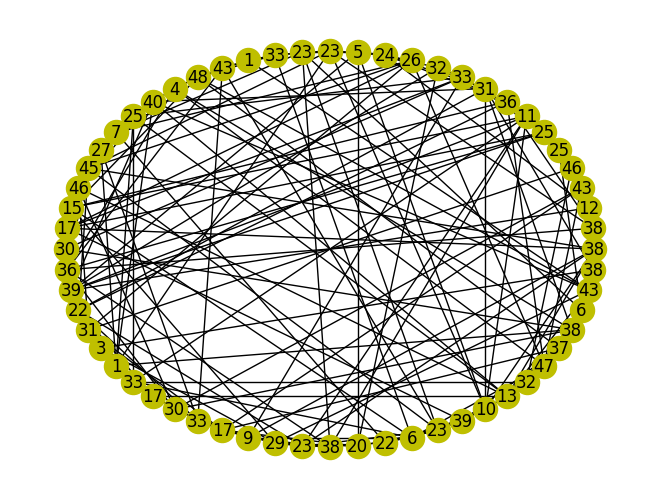

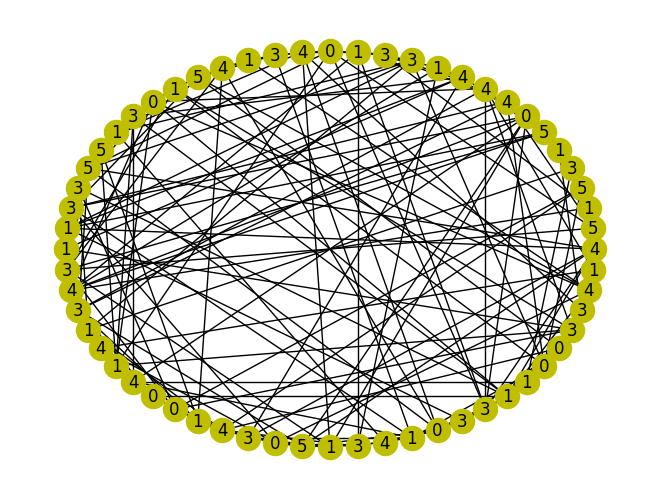

In [19]:
 # Exploring reducing colours used

def colour_reduce(G, colours):
    for n in G:
        conflict = ()

        # Recolour node based on degree centrality to introduce randomness
        if random.random() < nx.degree_centrality(G)[n]:
            memgraph.nodes[n]["colour"] = random.choice(list(memgraph.nodes[n]["memory"][c]['seen']==False for c in range(colours)))

        for m in G.neighbors(n):
            G.nodes[n]["memory"][G.nodes[m]["colour"]]["seen"] = True
            if G.nodes[n]['colour'] == G.nodes[m]['colour']:
                conflict = (m, G.nodes[m]["colour"])   
        
        if conflict:
            new_c = ()
            for m in range(colours):
                if G.nodes[n]["memory"][m]['seen']:
                    used = False
                    for l in G.neighbors(n):
                        if m == G.nodes[l]["colour"]:
                            new_c = ()
                            used = True
                    if not used:
                        new_c = (m)
                        break
                else:
                    if not new_c:
                        new_c = (m)
            if new_c:
                G.nodes[n]["colour"] = new_c

def check_correctness(G):
    for n in G:
        for m in G.neighbors(n):
            if G.nodes[n]["colour"] == G.nodes[m]["colour"]:
                return False
    return True

colours = 50
memgraph = G.copy()
compare_optimum = G.copy()
optimum = nx.greedy_color(compare_optimum, strategy="largest_first")
opt_num = len(set([optimum[n] for n in optimum]))
print(f"Optimum Number of Colours: {opt_num}")

for n in memgraph:
    memgraph.nodes[n]["colour"] = random.randrange(0, colours)
    memgraph.nodes[n]["memory"] = [{'seen': False} for c in range(colours)]

c_num = len(set([memgraph.nodes[n]["colour"] for n in memgraph]))
print(f"Colours used before:\t{c_num}")

plt.figure()
nx.draw_circular(memgraph, labels=dict([(n, int(memgraph.nodes[n]["colour"])) for n in memgraph]), node_color="y")

f = open("colour_iterations.csv", "w")
f.write("iterations,colours\n")

iter = 0
f.write(f"{iter},{c_num}\n")

while True:
    colour_reduce(memgraph, colours)
    iter = iter + 1
    if iter % 100 == 0:
        num_col = len(set([memgraph.nodes[n]["colour"] for n in memgraph]))
        print(f"Colours used at iteration {iter}: {num_col}", end="\r")
        f.write(f"{iter},{num_col}\n")
    if len(set([memgraph.nodes[n]["colour"] for n in memgraph])) <= opt_num and check_correctness(memgraph):
        print(f"Optimal number of colours achieved after {iter} runs")
        break

f.close()

print("Correct graph colouring using optimal number of colours found.")
print(list(dict.fromkeys([int(memgraph.nodes[n]["colour"]) for n in memgraph])))

plt.figure()
nx.draw_circular(memgraph, labels=dict([(n, int(memgraph.nodes[n]["colour"])) for n in memgraph]), node_color="y")
plt.show()